In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
%matplotlib inline


In [4]:
df=pd.read_csv("hotel_bookings_updated_2024.csv")

In [5]:
df.shape


(119390, 33)

In [6]:
pd.options.display.max_columns = 33 
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,city
0,Resort Hotel - Chandigarh,0,342,2024,July,30,27,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2024-07-27 22:16:40.916332324,Chandigarh
1,Resort Hotel - Mumbai,0,737,2024,April,17,28,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2024-04-28 21:56:21.507509066,Mumbai
2,Resort Hotel - Delhi,0,7,2024,September,37,10,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2024-09-10 03:46:25.734029096,Delhi
3,Resort Hotel - Kolkata,0,13,2024,August,33,14,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2024-08-14 18:07:10.049669568,Kolkata
4,Resort Hotel - Lucknow,0,14,2024,September,37,14,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2024-09-14 14:27:32.473846000,Lucknow


In [9]:
df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [67]:
a=df.groupby('customer_type')['reservation_status'].value_counts()/df['reservation_status'].count()
a

customer_type    reservation_status
Contract         Check-Out             0.023570
                 Canceled              0.010353
                 No-Show               0.000218
Group            Check-Out             0.004339
                 Canceled              0.000461
                 No-Show               0.000034
Transient        Check-Out             0.444752
                 Canceled              0.297822
                 No-Show               0.008016
Transient-Party  Check-Out             0.156923
                 Canceled              0.051671
                 No-Show               0.001843
Name: count, dtype: float64

In [67]:
a=df.groupby('customer_type')['reservation_status'].value_counts()/df['reservation_status'].count()
a

customer_type    reservation_status
Contract         Check-Out             0.023570
                 Canceled              0.010353
                 No-Show               0.000218
Group            Check-Out             0.004339
                 Canceled              0.000461
                 No-Show               0.000034
Transient        Check-Out             0.444752
                 Canceled              0.297822
                 No-Show               0.008016
Transient-Party  Check-Out             0.156923
                 Canceled              0.051671
                 No-Show               0.001843
Name: count, dtype: float64

In [38]:
print(f"les % de réservation ou annulation sont les suivants {confirmation}")

les % de réservation ou annulation sont les suivants reservation_status
Canceled     36.030656
Check-Out    62.958372
No-Show       1.010972
Name: reservation_status, dtype: float64


In [16]:
df.columns.sort_values(ascending=True)

Index(['adr', 'adults', 'agent', 'arrival_date_day_of_month',
       'arrival_date_month', 'arrival_date_week_number', 'arrival_date_year',
       'assigned_room_type', 'babies', 'booking_changes', 'children', 'city',
       'company', 'country', 'customer_type', 'days_in_waiting_list',
       'deposit_type', 'distribution_channel', 'hotel', 'is_canceled',
       'is_repeated_guest', 'lead_time', 'market_segment', 'meal',
       'previous_bookings_not_canceled', 'previous_cancellations',
       'required_car_parking_spaces', 'reservation_status',
       'reservation_status_date', 'reserved_room_type', 'stays_in_week_nights',
       'stays_in_weekend_nights', 'total_of_special_requests'],
      dtype='object')

In [22]:
b=df.query("customer_type=='Check-Out'")
b

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,city


In [28]:
c=[df['customer_type'] == 'Check-Out']

In [36]:
c

[0         False
 1         False
 2         False
 3         False
 4         False
           ...  
 119385    False
 119386    False
 119387    False
 119388    False
 119389    False
 Name: customer_type, Length: 119390, dtype: bool]

In [ ]:
df['customer_type'].unique()

In [16]:
pd.reset_option('display.max_columns')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,city
0,Resort Hotel - Chandigarh,0,342,2024,July,30,27,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2024-07-27 22:16:40.916332324,Chandigarh
1,Resort Hotel - Mumbai,0,737,2024,April,17,28,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2024-04-28 21:56:21.507509066,Mumbai
2,Resort Hotel - Delhi,0,7,2024,September,37,10,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2024-09-10 03:46:25.734029096,Delhi
3,Resort Hotel - Kolkata,0,13,2024,August,33,14,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2024-08-14 18:07:10.049669568,Kolkata
4,Resort Hotel - Lucknow,0,14,2024,September,37,14,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2024-09-14 14:27:32.473846000,Lucknow


In [38]:
df['arrival_date_month'].nunique()


12

In [4]:
df['arrival_date_month'].drop_duplicates().sort_values(ascending=True)

1         April
3        August
9      December
24     February
6       January
0          July
13         June
11        March
33          May
19     November
5       October
2     September
Name: arrival_date_month, dtype: object

In [5]:
df['arrival_date_month']=df['arrival_date_month'].map({'January':1,'February':2,'March':3,'April':4,'May':5, 'June':6, 'July':7, 'August':8, 'September':9,'October':10, 'November':11, 'December':12})
df['arrival_date_month']=df['arrival_date_month'].dropna()
df['arrival_date_month']

0          7
1          4
2          9
3          8
4          9
          ..
119385     9
119386    11
119387     4
119388    10
119389    12
Name: arrival_date_month, Length: 119390, dtype: int64

In [6]:
dictionary={'January':1,'February':2,'March':3,'April':4,'May':5, 'June':6, 'July':7, 'August':8, 'September':9,'October':10, 'November':11, 'December':12}
dictionary

{'January': 1,
 'February': 2,
 'March': 3,
 'April': 4,
 'May': 5,
 'June': 6,
 'July': 7,
 'August': 8,
 'September': 9,
 'October': 10,
 'November': 11,
 'December': 12}

In [7]:
df['month']=''

In [13]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,city,month
0,Resort Hotel - Chandigarh,0,342,2024,7,30,27,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,2024-07-27 22:16:40.916332324,Chandigarh,
1,Resort Hotel - Mumbai,0,737,2024,4,17,28,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,2024-04-28 21:56:21.507509066,Mumbai,
2,Resort Hotel - Delhi,0,7,2024,9,37,10,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,2024-09-10 03:46:25.734029096,Delhi,
3,Resort Hotel - Kolkata,0,13,2024,8,33,14,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,2024-08-14 18:07:10.049669568,Kolkata,
4,Resort Hotel - Lucknow,0,14,2024,9,37,14,0,2,2,...,NaN,0,Transient,98.0,0,1,Check-Out,2024-09-14 14:27:32.473846000,Lucknow,


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int64  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [15]:
# excluding all categorical columns
numerical_data = df.select_dtypes(exclude='object').dropna()
numerical_data

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
2392,0,6,2024,3,13,25,2,0,2,0.0,...,0,0,0,1,240.0,113.0,0,82.0,1,1
2697,0,24,2024,2,7,18,7,15,1,0.0,...,0,0,0,2,185.0,281.0,0,52.2,0,0
2867,0,24,2024,6,24,12,0,3,2,0.0,...,0,0,0,1,334.0,281.0,0,48.0,0,0
2877,0,24,2024,7,30,24,2,10,1,0.0,...,0,0,0,2,328.0,281.0,0,40.0,0,0
2878,0,24,2024,1,1,2,3,10,2,0.0,...,0,0,0,2,326.0,281.0,0,48.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112499,0,13,2024,12,48,1,0,1,2,0.0,...,0,0,0,0,9.0,478.0,0,150.0,0,1
113046,0,13,2024,12,49,3,1,3,1,0.0,...,0,0,0,1,290.0,148.0,0,95.0,0,0
113082,0,13,2024,7,29,21,1,3,2,0.0,...,0,0,0,1,290.0,148.0,0,110.0,0,0
113627,0,210,2024,11,44,1,0,1,2,0.0,...,0,0,0,0,14.0,229.0,0,135.0,0,0


In [16]:
# excluding all numerical columns
categorical_data = df.select_dtypes(exclude=('int','float'))
categorical_data

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,city,month
0,Resort Hotel - Chandigarh,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2024-07-27 22:16:40.916332324,Chandigarh,
1,Resort Hotel - Mumbai,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2024-04-28 21:56:21.507509066,Mumbai,
2,Resort Hotel - Delhi,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2024-09-10 03:46:25.734029096,Delhi,
3,Resort Hotel - Kolkata,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2024-08-14 18:07:10.049669568,Kolkata,
4,Resort Hotel - Lucknow,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2024-09-14 14:27:32.473846000,Lucknow,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel - Pune,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,2024-09-29 05:33:06.002060492,Pune,
119386,City Hotel - Mumbai,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out,2024-11-16 01:55:18.426320680,Mumbai,
119387,City Hotel - Lucknow,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,2024-04-19 07:50:22.982016768,Lucknow,
119388,City Hotel - Ahmedabad,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2024-10-05 12:37:40.429352788,Ahmedabad,


In [17]:
df_city=df.groupby('city')['city'].count()
df_city.to_frame()

,city
city,
Ahmedabad,8028
Bangalore,7897
Bhopal,8104
Chandigarh,7978
Chennai,7925
Delhi,7978
Goa,7973
Hyderabad,7981
Indore,7827


<Axes: >

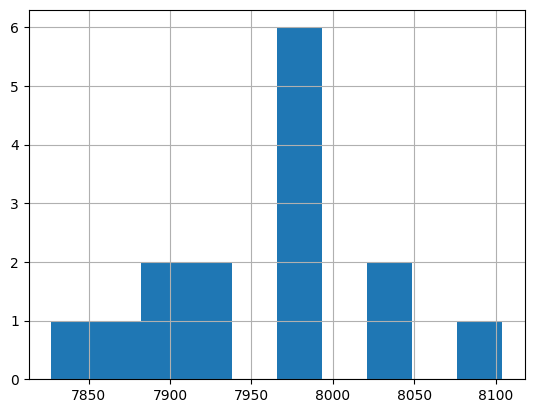

In [18]:
df_city.hist()

In [21]:
a=df_city.mean()

In [22]:
print(round(a))

7959


In [23]:
# categorical_data
# numerical_data

In [24]:
categorical_data.describe()

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,city,month
count,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,30,5,177,8,5,10,12,3,4,3,75629,15,1
top,City Hotel - Ahmedabad,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2024-01-13 19:56:56.304684686,Bhopal,
freq,5405,92310,48590,56477,97870,85994,74053,104641,89613,75166,8,8104,119390


In [25]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [26]:
imputer=SimpleImputer(strategy="most_frequent")
numerical_imputer=imputer.fit_transform(numerical_data)

In [27]:
scaler=StandardScaler()
numerical_imputer=imputer.fit_transform(numerical_imputer)

In [ ]:
#sur une colonne ok

In [28]:
binary_encoder = OneHotEncoder(sparse_output=False, drop='if_binary').set_output(transform='pandas')
df['hotel']= binary_encoder.fit_transform(df[['hotel']])
df['hotel'].head()

ValueError: Columns must be same length as key

In [31]:
# Instantiating the OHE
ohe = OneHotEncoder(drop="if_binary", sparse_output=False, min_frequency=0.05).set_output(transform='pandas')

# Fitting it to the categorical features
ohe.fit(categorical_data)

# Printing the different categories detected by the OHE
display(ohe.categories_)
# Since Sklearn 1.1, you can retrieve the names of the generated columns
display(ohe.get_feature_names_out())

# Storing the encoded features
encoded_features = ohe.transform(categorical_data)

encoded_features

[array(['City Hotel - Ahmedabad', 'City Hotel - Bangalore',
        'City Hotel - Bhopal', 'City Hotel - Chandigarh',
        'City Hotel - Chennai', 'City Hotel - Delhi', 'City Hotel - Goa',
        'City Hotel - Hyderabad', 'City Hotel - Indore',
        'City Hotel - Jaipur', 'City Hotel - Kochi',
        'City Hotel - Kolkata', 'City Hotel - Lucknow',
        'City Hotel - Mumbai', 'City Hotel - Pune',
        'Resort Hotel - Ahmedabad', 'Resort Hotel - Bangalore',
        'Resort Hotel - Bhopal', 'Resort Hotel - Chandigarh',
        'Resort Hotel - Chennai', 'Resort Hotel - Delhi',
        'Resort Hotel - Goa', 'Resort Hotel - Hyderabad',
        'Resort Hotel - Indore', 'Resort Hotel - Jaipur',
        'Resort Hotel - Kochi', 'Resort Hotel - Kolkata',
        'Resort Hotel - Lucknow', 'Resort Hotel - Mumbai',
        'Resort Hotel - Pune'], dtype=object),
 array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object),
 array(['ABW', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', '

array(['hotel_infrequent_sklearn', 'meal_BB', 'meal_HB', 'meal_SC',
       'meal_infrequent_sklearn', 'country_DEU', 'country_ESP',
       'country_FRA', 'country_GBR', 'country_PRT',
       'country_infrequent_sklearn', 'market_segment_Direct',
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'market_segment_infrequent_sklearn',
       'distribution_channel_Corporate', 'distribution_channel_Direct',
       'distribution_channel_TA/TO',
       'distribution_channel_infrequent_sklearn', 'reserved_room_type_A',
       'reserved_room_type_D', 'reserved_room_type_E',
       'reserved_room_type_infrequent_sklearn', 'assigned_room_type_A',
       'assigned_room_type_D', 'assigned_room_type_E',
       'assigned_room_type_infrequent_sklearn', 'deposit_type_No Deposit',
       'deposit_type_Non Refund', 'deposit_type_infrequent_sklearn',
       'customer_type_Transient', 'customer_type_Transient-Party',
       'customer_type_infrequent_sklearn',

,hotel_infrequent_sklearn,meal_BB,meal_HB,meal_SC,meal_infrequent_sklearn,country_DEU,country_ESP,country_FRA,country_GBR,country_PRT,...,city_Goa,city_Hyderabad,city_Indore,city_Jaipur,city_Kochi,city_Kolkata,city_Lucknow,city_Mumbai,city_Pune,month_
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
119386,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
119387,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
119388,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
